In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
import tensorflow
from tensorflow import keras 

from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import *


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the data set
p = '/content/drive/My Drive/CK+48'
data_dir_list = os.listdir(p)
arrayListData=[]

for d in data_dir_list:
    images=os.listdir(p+'/'+ d)
    print ('Loading images of -'+'{}\n'.format(d))
    for i in images:
        take=cv2.imread(p + '/'+ d + '/'+ i )
        take1=cv2.resize(take,(48,48))
        arrayListData.append(take1)
        
d1 = np.array(arrayList)
d1 = d1.astype('float32')
d1 = d1/255
d1.shape

Loaded the images of dataset-fear

Loaded the images of dataset-contempt

Loaded the images of dataset-disgust

Loaded the images of dataset-surprise

Loaded the images of dataset-sadness

Loaded the images of dataset-happy

Loaded the images of dataset-anger



(981, 48, 48, 3)

In [ ]:
num_of_samples = d1.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 
labels[135:188]=1
labels[189:365]=2
labels[366:440]=3
labels[441:647]=4
labels[648:731]=5
labels[732:980]=6


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
img_Labels = np_utils.to_categorical(labels, 7)
x,y = shuffle(d1,img_Labels, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)
x_test=X_test

In [ ]:
from tensorflow import keras 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation


left_branch_input = Input(shape=(48,48,3), name='Left_input')
A1 = Conv2D(64, kernel_size=5, padding='same',activation='relu')(left_branch_input)
A2 = BatchNormalization()(A1)
A3 = MaxPooling2D(pool_size=(2, 2))(A2)
A4 = (Dropout(.3))(A3)
A5 = Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu')(A4)
A6 = MaxPooling2D(pool_size=(2, 2))(A5)
A7 = Dropout(.5)(A6)
A8 = Flatten()(A7)
A9 = Dense(2034, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01))(A8)

right_branch_input = Input(shape=(48,48,3), name='Right_input')
B1 = Conv2D(64, kernel_size=(5, 5), padding='same',activation='relu')(right_branch_input)
B2 = BatchNormalization()(B1)
B3 = MaxPooling2D(pool_size=(2, 2))(B2)
B4 = Dropout(.3)(B3)


B5 = Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu')(B4)
B6 = MaxPooling2D(pool_size=(2, 2))(B5)
B7 = Dropout(.5)(B6)

B8 = Flatten()(B7)
B9 = Dense(2034, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01))(B8)

concat = concatenate([A9, B9], name='Concatenate')
final_model_output = Dense(7, activation='sigmoid')(concat)
final_model = Model(inputs=[left_branch_input, right_branch_input], outputs=final_model_output,
                    name='Final_output')


ada = Adadelta(lr=0.2, rho=0.95, epsilon=1e-08)
final_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
final_model.summary()

Model: "Final_output"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Left_input (InputLayer)         [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
Right_input (InputLayer)        [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 64)   4864        Left_input[0][0]                 
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 48, 48, 64)   4864        Right_input[0][0]                
_______________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

lr_R = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, verbose=1)

In [ ]:
history=final_model.fit([X_train,X_train], (y_train),
          batch_size=64,
          epochs=90,
          verbose=1,
          validation_data=([X_test,X_test],(y_test)),
          shuffle=True,callbacks=[lr_R]
          )

Epoch 1/90
14/14 [==============================] - 31s 104ms/step - loss: 87.5529 - accuracy: 0.1549 - val_loss: 50.2562 - val_accuracy: 0.1351
Epoch 2/90
14/14 [==============================] - 1s 68ms/step - loss: 43.6358 - accuracy: 0.1993 - val_loss: 35.9363 - val_accuracy: 0.1554
Epoch 3/90
14/14 [==============================] - 1s 68ms/step - loss: 31.3491 - accuracy: 0.2965 - val_loss: 26.3032 - val_accuracy: 0.2230
Epoch 4/90
14/14 [==============================] - 1s 68ms/step - loss: 23.0198 - accuracy: 0.3409 - val_loss: 19.7181 - val_accuracy: 0.2500
Epoch 5/90
14/14 [==============================] - 1s 68ms/step - loss: 17.2754 - accuracy: 0.3794 - val_loss: 15.2214 - val_accuracy: 0.3649
Epoch 6/90
14/14 [==============================] - 1s 67ms/step - loss: 13.2499 - accuracy: 0.4502 - val_loss: 12.0439 - val_accuracy: 0.3581
Epoch 7/90
14/14 [==============================] - 1s 66ms/step - loss: 10.4998 - accuracy: 0.4754 - val_loss: 9.8197 - val_accuracy: 0.439

In [ ]:
# visualizing losses and accuracy
import matplotlib.pyplot as plt
%matplotlib inline

train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_accuracy')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

NameError: ignored

In [ ]:
labels = ['anger','contempt','disgust','fear','happy','sadness','surprise']

In [ ]:
from sklearn.metrics import confusion_matrix 
import matplotlib 
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    """
    The function is used to construct the confusion matrix 
    """
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(7,7))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

 



3/3 [==============================] - 0s 16ms/step


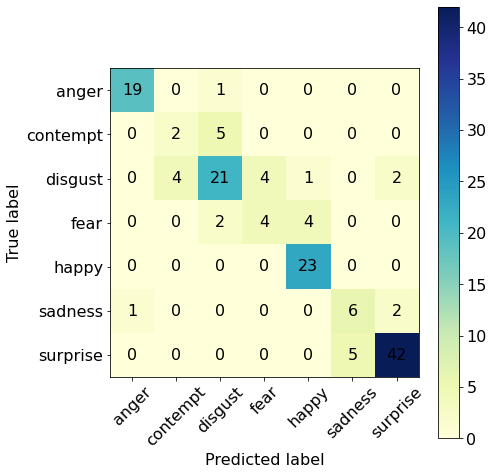

In [ ]:
y_prob=final_model.predict([X_test,X_test],batch_size=64,verbose=1)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_test]
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)
plt.show()

In [ ]:
names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

In [ ]:
# Evaluating the model
score = final_model.evaluate([X_test,X_test], y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)



Test Loss: 0.9777425527572632
Test accuracy: 0.7905405163764954
(1, 48, 48, 3)


148
148


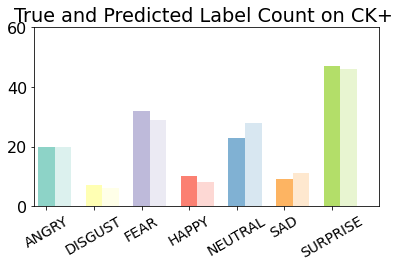

In [ ]:
import brewer2mpl
 
def plot_distribution2(y_true, y_pred):
    """
    The function is used to compare the number of true labels as well as prediction results
    """
    colorset = brewer2mpl.get_map('Set3', 'qualitative', 7).mpl_colors
    ind = np.arange(1.5,8,1)  # the x locations for the groups
    width = 0.35
    fig, ax = plt.subplots()
    true = ax.bar(ind, np.bincount(y_true), width, color=colorset, alpha=1.0)
    pred = ax.bar(ind + width, np.bincount(y_pred), width, color=colorset, alpha=0.3)
    ax.set_xticks(np.arange(1.5,8,1))
    ax.set_xticklabels(names, rotation=30, fontsize=14)
    ax.set_xlim([1.25, 8.5])
    ax.set_ylim([0, 60])
    ax.set_title('True and Predicted Label Count on CK+ ')
    plt.tight_layout()
    plt.show()
 
print(len(y_true))
print(len(y_pred)) 
plot_distribution2(y_true, y_pred)



In [ ]:
pip install brewer2mpl